In [1]:
!pip install scikitplot


ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale= 1.2)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
# import scikitplot as skplt

from imblearn.over_sampling import RandomOverSampler


In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.drop('id', axis= 1, inplace= True)
data.shape

(5110, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
data[['hypertension', 'heart_disease', 'stroke']] = data[['hypertension', 'heart_disease', 'stroke']].astype(str)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [7]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


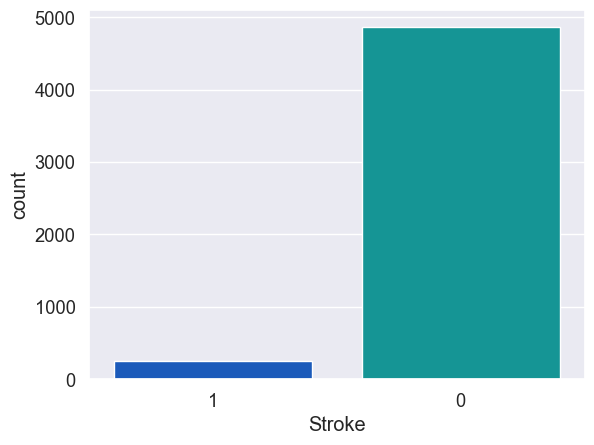

In [8]:
sns.countplot(x = data['stroke'], palette= 'winter')
plt.xlabel('Stroke');

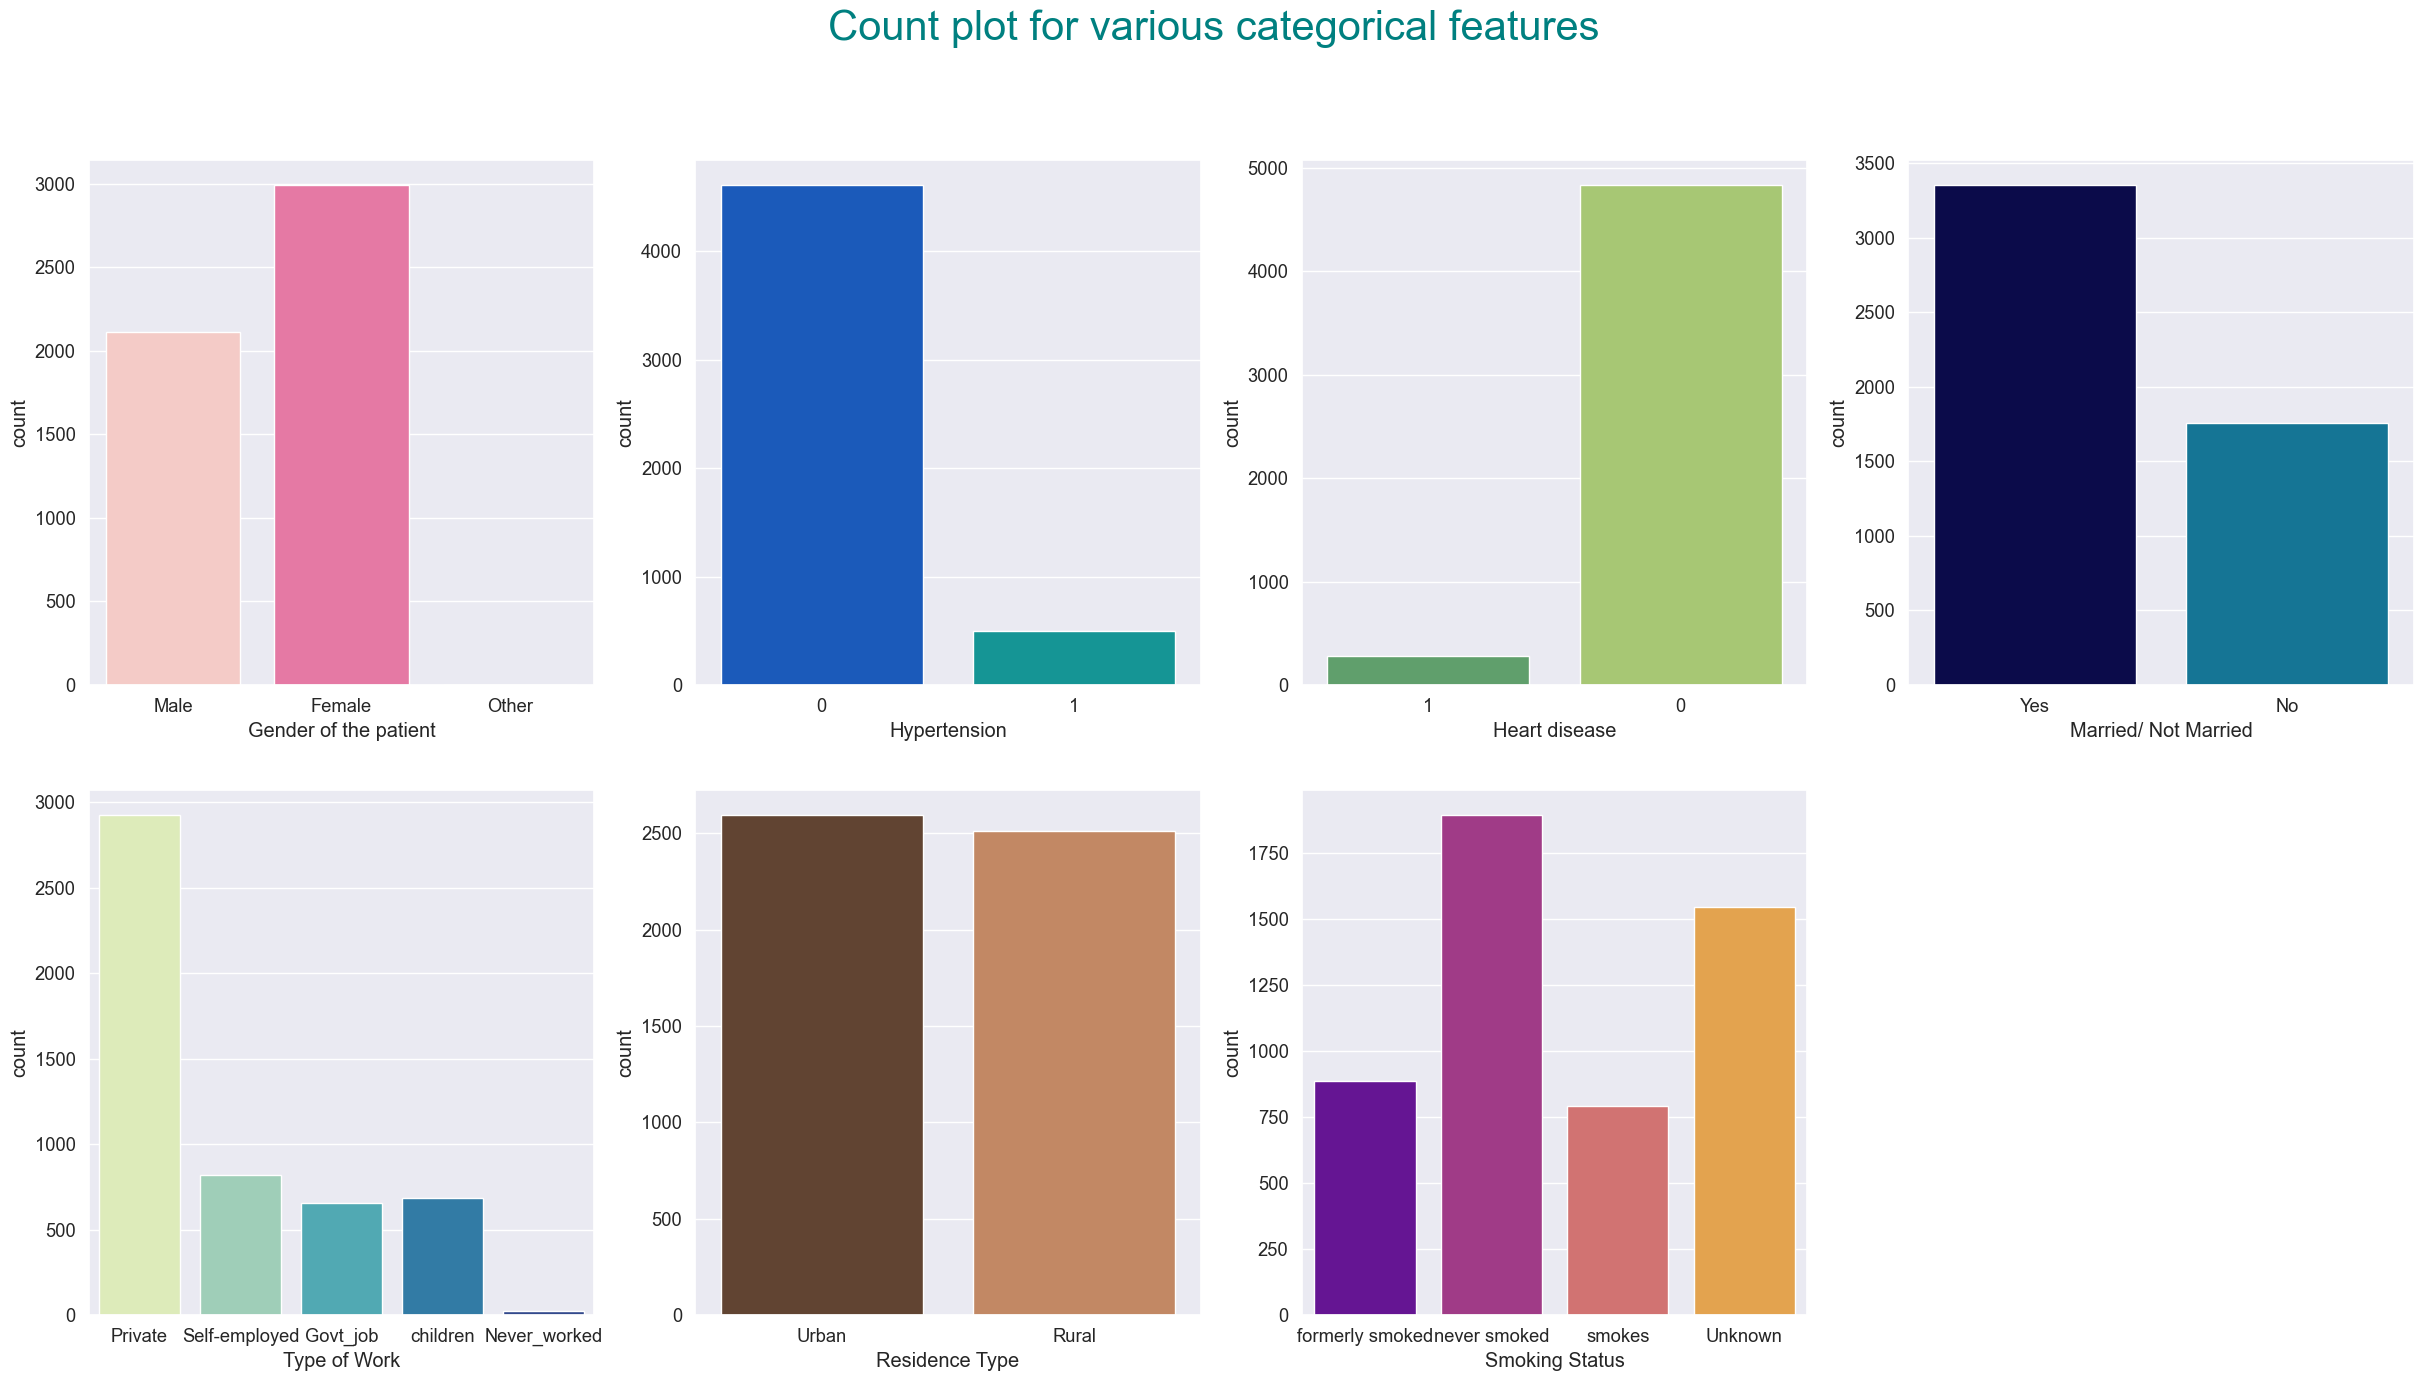

In [9]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= data, ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= data, ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= data, ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= data, ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= data, ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= data, ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= data, ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [10]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
data.drop(data[data['gender'] == 'Other'].index, inplace= True)

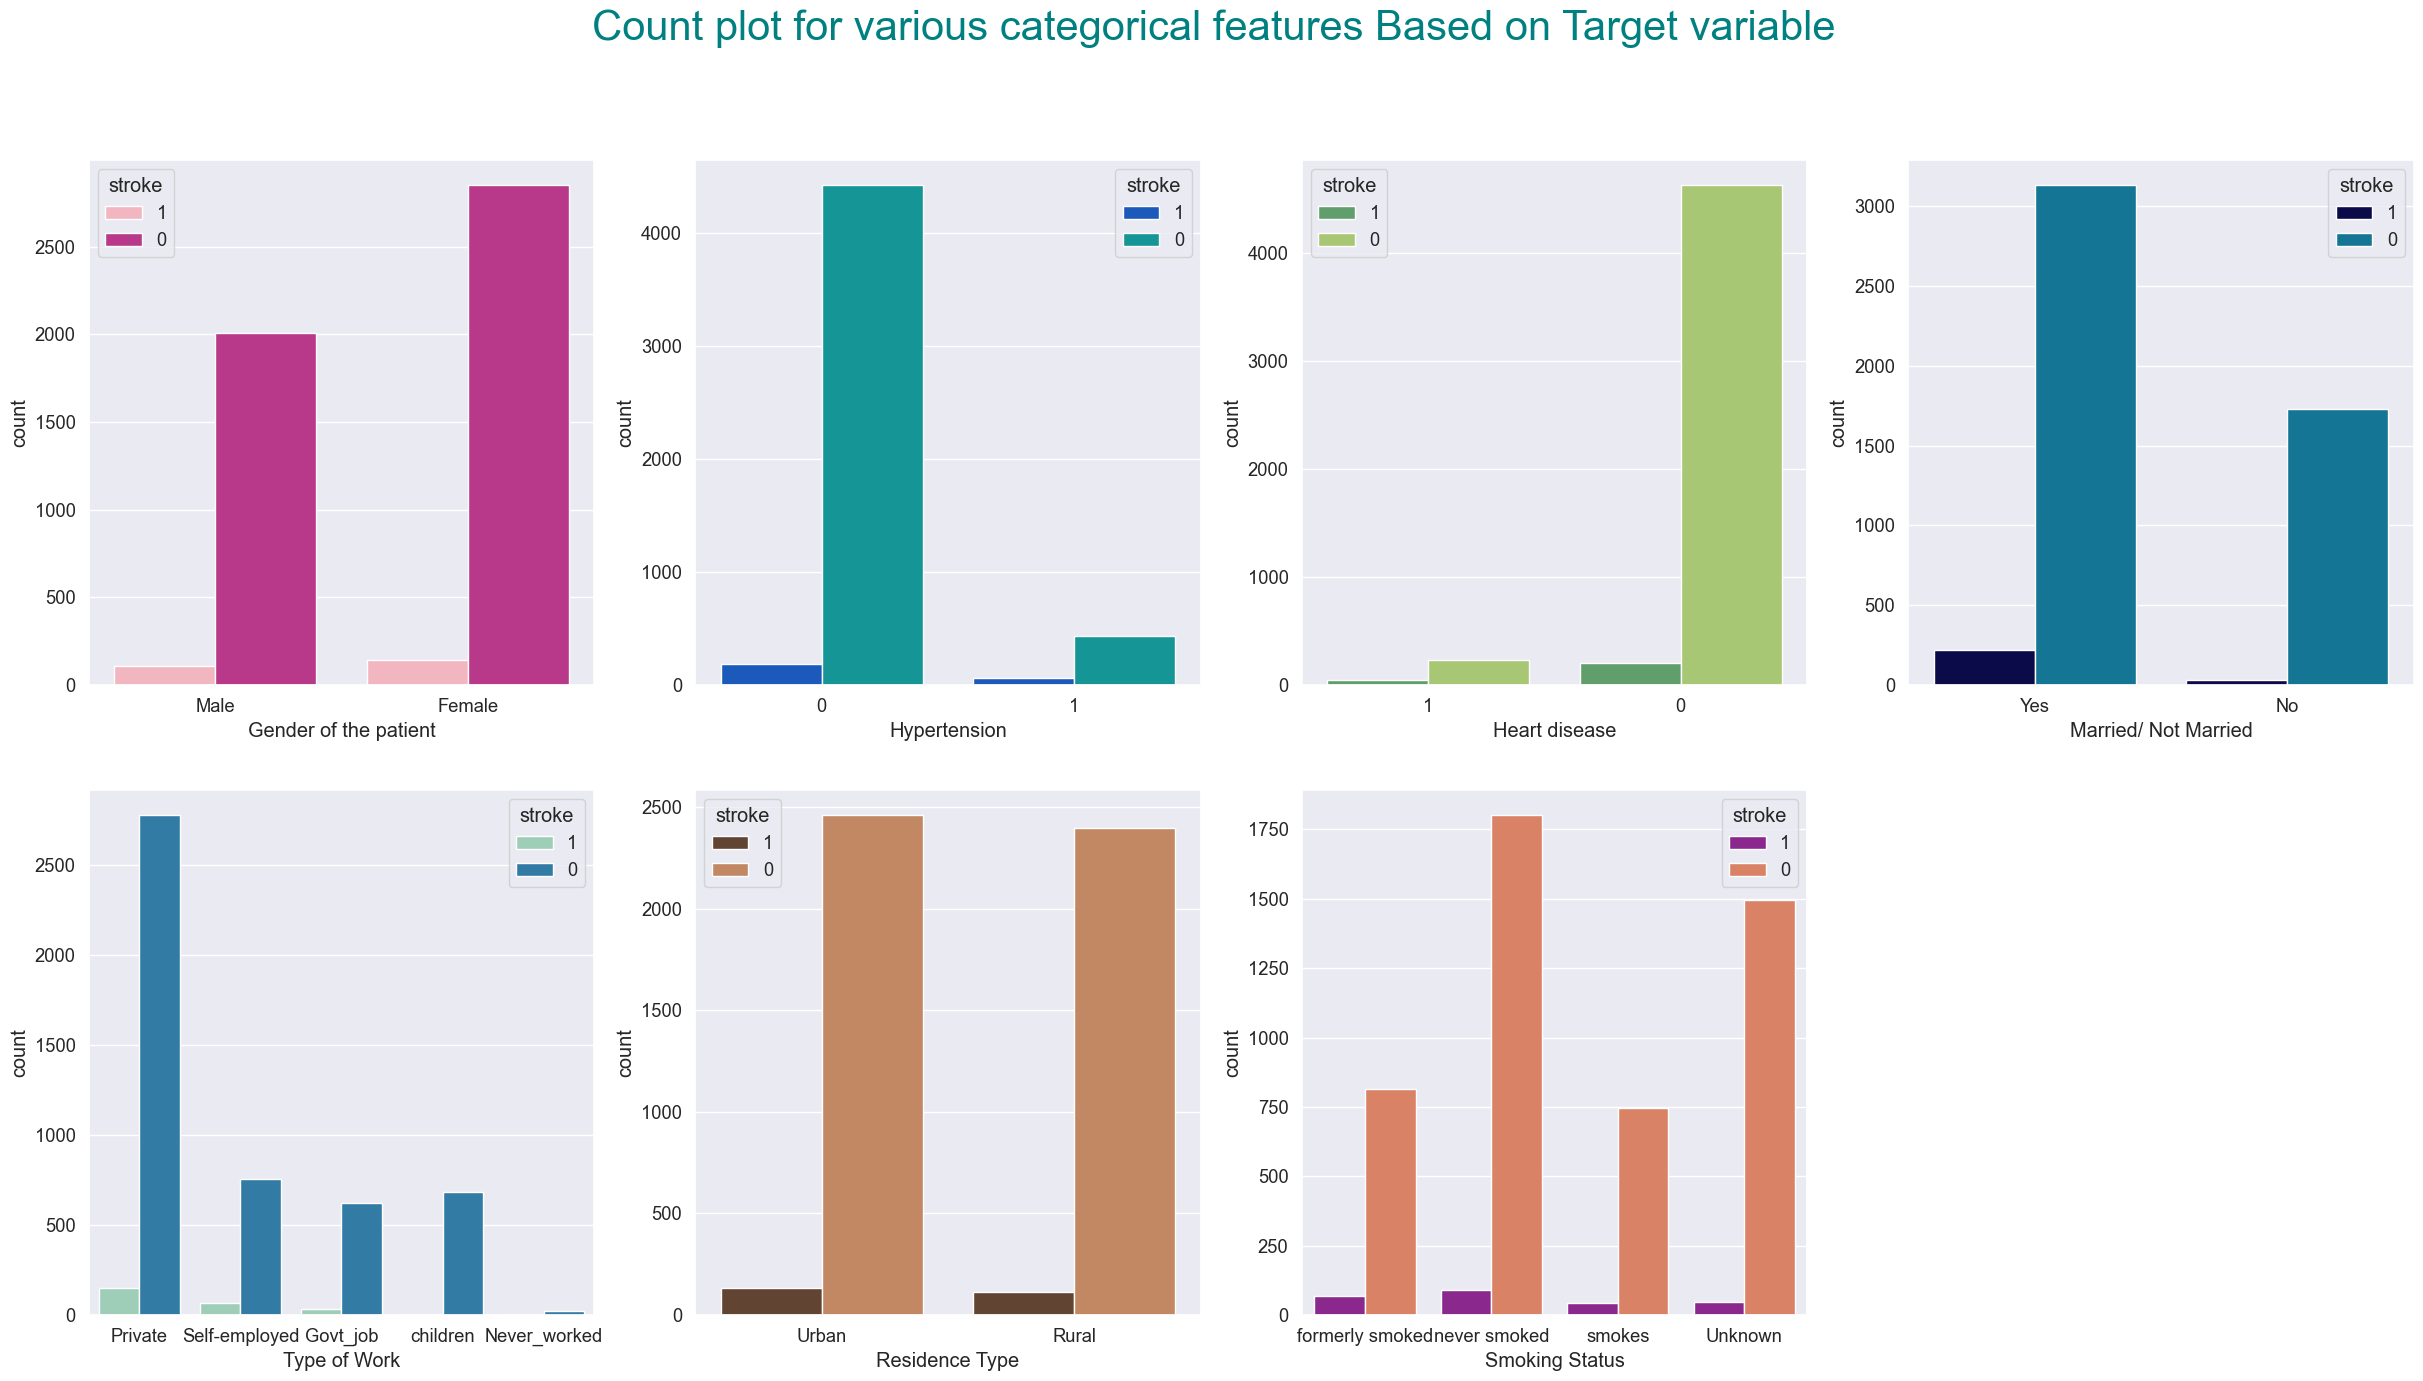

In [12]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various categorical features Based on Target variable', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='gender', data= data, hue= 'stroke', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= data, hue= 'stroke', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= data, hue= 'stroke', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= data, hue= 'stroke', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= data, hue= 'stroke', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= data, hue= 'stroke', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= data, hue= 'stroke', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [13]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

data1 = knn_impute(data, 'bmi')

data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
data2 = pd.get_dummies(data1, drop_first= True)
data2.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.60,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,31.38,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.50,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.40,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.00,0,1,0,1,0,0,1,0,0,0,1,0,1


In [16]:
s = StandardScaler()
data2[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(data2[['bmi', 'avg_glucose_level', 'age']])

data3 = data2.copy()
data3.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.051242,2.706450,0.985873,1,0,1,1,0,1,0,0,1,1,0,0,1
1,0.785889,2.121652,0.313623,0,0,0,1,0,0,1,0,0,0,1,0,1
2,1.626174,-0.004867,0.457860,1,0,1,1,0,1,0,0,0,0,1,0,1
3,0.255182,1.437473,0.702549,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1.581949,1.501297,-0.636801,0,1,0,1,0,0,1,0,0,0,1,0,1


In [17]:
data3.shape

(5109, 16)

In [18]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=data3.drop(['stroke_1'],axis=1)
y=data3['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42)

print(y_train.value_counts())
print(y_test.value_counts())

1    3892
0    3884
Name: stroke_1, dtype: int64
0    976
1    968
Name: stroke_1, dtype: int64


Cross-Validation Accuracy for logisticregression: 0.7739
Model: logisticregression
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       976
           1       0.76      0.84      0.80       968

    accuracy                           0.79      1944
   macro avg       0.79      0.79      0.79      1944
weighted avg       0.79      0.79      0.79      1944

Accuracy: 0.7890946502057613


<Figure size 1500x1000 with 0 Axes>

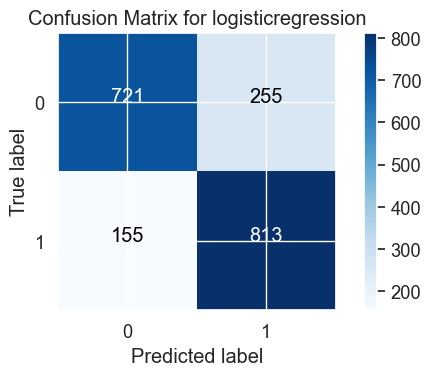



Cross-Validation Accuracy for kneighborsclassifier: 0.9183
Model: kneighborsclassifier
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       976
           1       0.87      1.00      0.93       968

    accuracy                           0.93      1944
   macro avg       0.94      0.93      0.93      1944
weighted avg       0.94      0.93      0.93      1944

Accuracy: 0.926440329218107


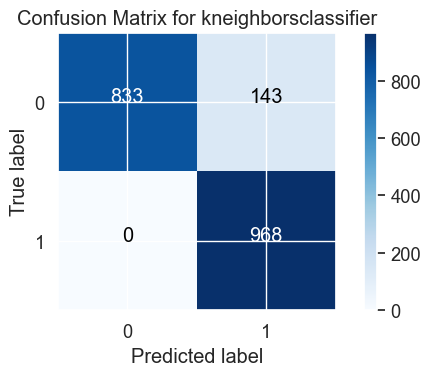



Cross-Validation Accuracy for svc: 0.7749
Model: svc
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       976
           1       0.76      0.84      0.80       968

    accuracy                           0.79      1944
   macro avg       0.79      0.79      0.79      1944
weighted avg       0.79      0.79      0.78      1944

Accuracy: 0.7854938271604939


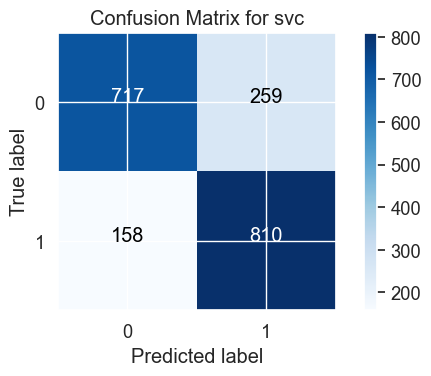



Cross-Validation Accuracy for gaussiannb: 0.7377
Model: gaussiannb
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       976
           1       0.71      0.87      0.78       968

    accuracy                           0.76      1944
   macro avg       0.77      0.76      0.76      1944
weighted avg       0.77      0.76      0.76      1944

Accuracy: 0.7587448559670782


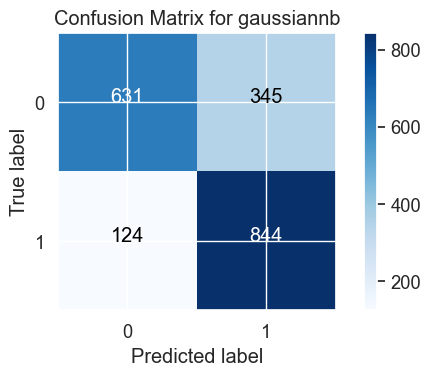

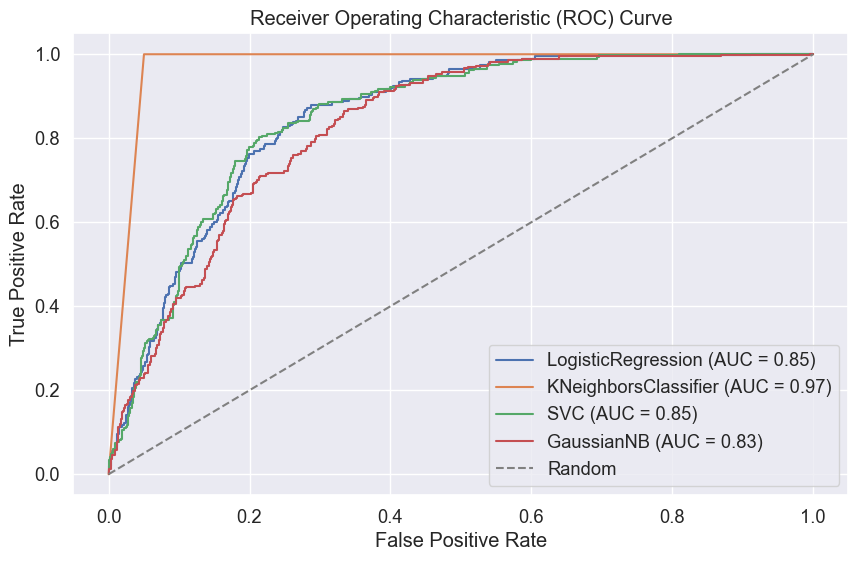

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier for ANN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB for Naive Bayes
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import itertools
import warnings  # Import the warnings module to suppress warnings

# Suppress FutureWarnings related to is_sparse
warnings.simplefilter(action='ignore', category=FutureWarning)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Models with Lasso feature selection
models = [
    make_pipeline(SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear')), LogisticRegression(C=3)),
    make_pipeline(SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear')), KNeighborsClassifier()),
    make_pipeline(SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear')), SVC(kernel='linear')),  # Replace RandomForest with SVM
    make_pipeline(SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear')), GaussianNB())  # Add Naive Bayes
]

plt.figure(figsize=(15, 10))

for idx, model in enumerate(models):
    # Cross-Validation
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy for {type(model[-1]).__name__.lower()}: {cv_accuracy.mean():.4f}")

    # Train the Model
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    # Evaluate the Model
    model_name = type(model[-1]).__name__.lower()
    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    classes = list(set(y_test))
    tick_marks = list(range(len(classes)))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()
    print("\n")

print("\n")

plt.figure(figsize=(10, 6))

for model in models:
    # Train the Model
    model.fit(X_train, y_train)

    # ROC Curve
    if hasattr(model[-1], "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_value = roc_auc_score(y_test, y_probs)

        # Plot ROC Curve
        plt.plot(fpr, tpr, label=f'{type(model[-1]).__name__} (AUC = {auc_value:.2f})')

    elif hasattr(model[-1], "decision_function"):  # Check for SVM
        y_scores = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc_value = roc_auc_score(y_test, y_scores)

        # Plot ROC Curve for SVM
        plt.plot(fpr, tpr, label=f'{type(model[-1]).__name__} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()